In [469]:
import numpy as np
from sklearn import model_selection
from IPython.display import display

# 1 Precision-Recall Curves

In [470]:
from sklearn.datasets import load_digits


digits = load_digits()

print(digits.keys())

data = digits["data"]
images = digits["images"]
target = digits["target"]
target_names = digits["target_names"]


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


## 1.1 Euclidean Distance

In [471]:


def dist_vec(query: np.ndarray, dataset: np.ndarray) -> np.ndarray:
    """Calculate the euclidean distance between all instances in the training and test set

    Using numpy vectorized functions
    
    Parameters
    ----------
    query : numpy.ndarray
        2D array of the size N x D, with D pixels per image and N instances
        in the training set.

    dataset : np.ndarray
        2D array of the size M x D, with D pixels per image and M instances 
        in the test set.

    Returns
    -------
    distances : np.ndarray
        2D array of the size N x M. 
        The euclidean distance between all instances.

    """
    AB = np.dot(dataset, np.transpose(query)) 
    AA = np.sum(np.square(dataset), axis=1)
    BB = np.sum(np.square(query), axis=1) 
    dist_matrix = np.sqrt(np.transpose(BB - 2 * AB) + AA) 
    return dist_matrix


In [472]:
D: np.ndarray = dist_vec(data, data)

S = np.argsort(D, axis=1)


In [473]:


def true_false_positives(S: np.ndarray, query_labels: np.ndarray, dataset_labels: np.ndarray):
    _i, _m = S.shape
    tps = []
    fps = []
    
    for i in range(_i):
        S_i = S[i]
        is_positive = query_labels[i] == dataset_labels[S_i]
        tps.append(np.cumsum(is_positive))
        fps.append(np.cumsum(np.logical_not(is_positive)))
    return np.array(tps).reshape((_i, -1)), np.array(fps).reshape((_i, -1))


TP, FP = true_false_positives(S, target, target)
N_i = TP[:, -1]

precision = TP / (TP+FP)

recall = TP / N_i


     AUC  k
0.939261  0
0.460951  1
0.614456  2
0.640516  3
0.693937  4
0.595976  5
0.880960  6
0.693171  7
0.445930  8
0.486551  9


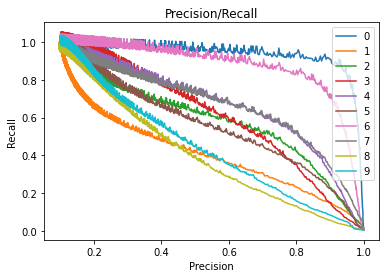

In [474]:
import pandas as pd
import matplotlib.pyplot as plt


AUCs = []
for k in range(10):
    avg_prec = np.mean(precision[target == k], axis=0)
    avg_recall = np.mean(recall[target == k], axis=0)

    plt.plot(avg_prec, avg_recall, label=k)

    AUCs.append(np.trapz(avg_prec, avg_recall))


df = pd.DataFrame(
    {
        "AUC": AUCs,
        "k": list(range(10))
    }
)
print(df.to_string(index=False))


plt.title(r"Precision/Recall")
plt.xlabel("Precision")
plt.ylabel("Recall")
_ = plt.legend()


 AUC - Gain  k
   0.996429  0
   0.899048  1
   0.940279  2
   0.950290  3
   0.957373  4
   0.945830  5
   0.991328  6
   0.971743  7
   0.885183  8
   0.886285  9


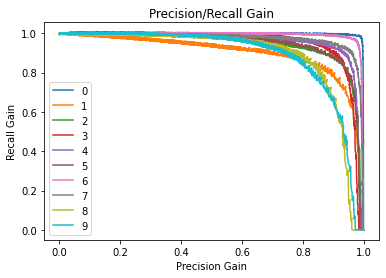

In [475]:
N_frac = len(data) / N_i

precision_gain = ( N_frac - ( 1 / precision ) ) / ( N_frac - 1 )
precision_gain[precision_gain < 0] = 0

recall_gain = ( N_frac - 1 / recall ) / ( N_frac - 1 )
recall_gain[recall_gain < 0] = 0

AUCs = []
for k in range(10):
    avg_prec = np.mean(precision_gain[target == k], axis=0)
    avg_recall = np.mean(recall_gain[target == k], axis=0)

    plt.plot(avg_prec, avg_recall, label=k)

    AUCs.append(np.trapz(avg_prec, avg_recall))


df = pd.DataFrame(
    {
        "AUC - Gain": AUCs,
        "k": list(range(10))
    }
)
print(df.to_string(index=False))


plt.title(r"Precision/Recall Gain")
plt.xlabel("Precision Gain")
plt.ylabel("Recall Gain")
_ = plt.legend()


### Differences

In the plot `Precision/Recall` one can see how the classifier performs for the different classes. This does not allow for good comparison with other classifiers, it is only good for analysing the classifier for the given data set.

The plot `Precision/Recall Gain` compares the classifier from before with the naive classifier, aka guessing. This allows for better comparison with other classifiers.

## 1.2 Hand-Crafter Distance

In [ ]:
...

# 2 Red Cards Study